## 分析A/B测试结果


## 目录
- [简介](#intro)
- [I - 概率](#probability)
- [II - A/B 测试](#ab_test)


<a id='intro'></a>
### 简介


对于这个项目，你将要了解的是电子商务网站运行的 A/B 测试的结果。你的目标是通过这个 notebook 来帮助公司弄清楚他们是否应该使用新的页面，保留旧的页面，或者应该将测试时间延长，之后再做出决定。


<a id='probability'></a>
#### I - 概率

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` 现在，导入 `ab_data.csv` 数据，并将其存储在 `df` 中。 

a. 导入数据集，并在这里查看前几行：

In [2]:
df = pd.read_csv('ab_data.csv')
df.head(3)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0


b. 使用下面的单元格来查找数据集中的行数。

In [3]:
df.info(),df.converted.unique(),df.landing_page.unique(),df.group.unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


(None,
 array([0, 1], dtype=int64),
 array(['old_page', 'new_page'], dtype=object),
 array(['control', 'treatment'], dtype=object))

c. 数据集中独立用户的数量。

In [4]:
df.user_id.nunique()

# 数据集中独立用户的数量

290584

d. 用户转化的比例。

In [5]:
df.query('converted == 1').user_id.size / df.user_id.size

## 计算用户转换的比例

0.11965919355605512

e.  `new_page` 与 `treatment` 不一致的次数。

In [6]:
df.query('landing_page == "old_page" and group == "treatment"').user_id.size
## 登录旧网页的实验组

1965

In [7]:
df.query('landing_page == "new_page" and group == "control"').user_id.nunique()
## 登录新网页的对照组

1928


f. 是否有任何行存在缺失值？

In [8]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` 

a. 现在，使用测试题的答案创建一个符合测试规格要求的新数据集。将新 dataframe 存储在 **df2** 中。

In [9]:
df_a = df.query('landing_page == "old_page" and group == "control"')
df_b = df.query('landing_page == "new_page" and group == "treatment"')
df2 = df_a.append(df_b , ignore_index=True)

In [10]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290585 entries, 0 to 290584
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.1+ MB


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1
3,936923,2017-01-10 15:20:49.083499,control,old_page,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0


In [11]:
## 确认所有的无效数据都已经被移除
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` 

a.  **df2** 中有多少唯一的 **user_id**?

In [12]:
df2.user_id.nunique()

290584

b.  **df2** 中有一个重复的 **user_id** 。它是什么？ 

In [13]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
146678,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. 这个重复的  **user_id** 的行信息是什么？

In [14]:
df2.iloc[146678]

user_id                             773192
timestamp       2017-01-14 02:55:59.590927
group                            treatment
landing_page                      new_page
converted                                0
Name: 146678, dtype: object

d. 删除 **一个** 含有重复的 **user_id** 的行， 但使你的 dataframe 为 **df2**。

In [15]:
df2 = df2.drop(146678)
df2 = df2.reset_index(drop=True)
df2.iloc[146678]

user_id                             884145
timestamp       2017-01-09 15:45:38.457508
group                            treatment
landing_page                      new_page
converted                                0
Name: 146678, dtype: object

`4.` 在下面的单元格中，使用 **df2** 来回答与课堂中的 **测试 4** 相关的测试题目。

a. 不管它们收到什么页面，单个用户的转化率是多少？


In [16]:
df2.converted.mean()

0.11959708724499628

b. 假定一个用户处于 `control` 组中，他的转化率是多少？

In [17]:
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. 假定一个用户处于 `treatment` 组中，他的转化率是多少？


In [18]:
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. 一个用户收到新页面的概率是多少？


In [19]:
df2.query('landing_page == "new_page"').user_id.size / df2.user_id.size

0.5000619442226688

In [20]:
df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()

-0.0015782389853555567

我们已知，总体的转变概率是11.96%,在对照组中是12.04% ，在实验组中为11.88%

<a id='ab_test'></a>
### II - A/B 测试


`1.` 现在，你要考虑的是，你需要根据提供的所有数据做出决定。如果你想假定旧的页面效果更好，除非新的页面在类型I错误率为5％的情况下才能证明效果更好，那么，你的零假设和备择假设是什么？ 你可以根据单词或旧页面与新页面的转化率 **$p_{old}$** 与 **$p_{new}$** 来陈述你的假设。


$H_0: p_{new} - p_{old} \leq 0$

$H_1: p_{new} - p_{old} > 0$

`2.` 假定在零假设中，不管是新页面还是旧页面， $p_{new}$ and $p_{old}$ 都具有等于 **转化** 成功率的“真”成功率，也就是说，  $p_{new}$ 与 $p_{old}$ 是相等的。此外，假设它们都等于**ab_data.csv** 中的 **转化** 率，新旧页面都是如此。  <br><br>

每个页面的样本大小要与 **ab_data.csv** 中的页面大小相同。  <br><br>

执行两次页面之间 **转化** 差异的抽样分布，计算零假设中10000次迭代计算的估计值。  <br><br>


a. 在零假设中，$p_{new}$ 的 **convert rate（转化率）** 是多少？


In [21]:
## 在零假设下我们得到P(old)与P(new)相等
df2.converted.mean()

0.11959708724499628

b. 在零假设中， $p_{old}$  的 **convert rate（转化率）** 是多少？ <br><br>

In [22]:
df2.converted.mean()

0.11959708724499628

c.  $n_{new}$ 是多少？

In [23]:
df2.query('group == "treatment"').user_id.size #145310 147276

## 计算Nnew的数量大小

145310

d.  $n_{old}$?是多少？

In [24]:
df2.query('group == "control"').user_id.size #145274 147202

## 计算Nold的数量大小

145274

e. 在零假设中，使用 $p_{new}$ 转化率模拟 $n_{new}$ 交易，并将这些 $n_{new}$ 1's 与 0's 存储在 **new_page_converted** 中。

In [25]:
convert_rate = df2.query('converted == 1').shape[0] / df2.shape[0] ; convert_rate
## convert_rate 指的是改变的数量除以总的数量

0.11959708724499628

In [26]:
new_page_converted = np.random.choice([0,1], size=145310, p=[1-0.1196, 0.1196]);new_page_converted

array([0, 1, 0, ..., 0, 0, 0])

f. 在零假设中，使用 $p_{old}$ 转化率模拟 $n_{old}$ 交易，并将这些  $n_{old}$ 1's 与 0's 存储在 **old_page_converted** 中。

In [27]:
old_page_converted = np.random.choice([0,1], size=145274,replace = True, p=[1-0.1196, 0.1196]); old_page_converted

array([0, 0, 0, ..., 0, 0, 0])

g. 在 (e) 与 (f)中找到 $p_{new}$ - $p_{old}$ 模拟值。

In [28]:
new_page_converted.mean() - old_page_converted.mean()

0.0014296975871489759

h. 使用**a. 到 g. ** 中的计算方法来模拟 10,000个 $p_{new}$ - $p_{old}$ 值，并将这 10,000 个值存储在 **p_diffs** 中。

In [29]:
p_diffs = []

for i in range(10000):
    control_df = np.random.choice([0,1],size=145274,p=[1-0.1196,0.1196])
    treat_df = np.random.choice([0,1],size = 145310,p=[1-0.1196,0.1196])
    p_old = control_df.mean()
    p_new = treat_df.mean()
    p_diffs.append(p_new - p_old)
    
p_diffs = np.array(p_diffs)

i. 绘制一个 **p_diffs** 直方图。

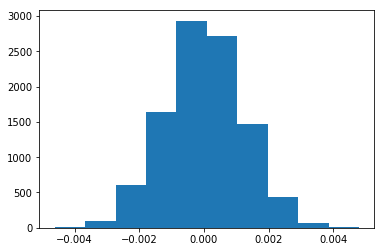

In [30]:
plt.hist(p_diffs)
plt.show()

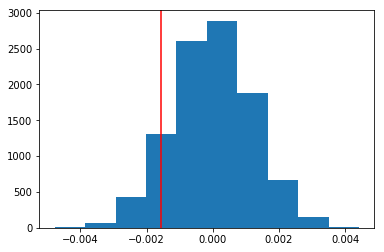

In [32]:
null_vals = np.random.normal(0 , p_diffs.std() , p_diffs.size)
plt.hist(null_vals)
plt.axvline(x = -0.001576,color='r')

j.  在**p_diffs**列表的数值中，有多大比例大于 **ab_data.csv** 中观察到的实际差值？

In [33]:
(null_vals > -0.001576).mean()

0.9019

k.我们刚刚计算了p值，p值表现了我们接受零假设的概率。我们不能拒绝零假设，因为(0.9>0.05)
这意味着差异非常不显著，新页面不会比旧页面更好。